# 简介

## 特点

* 具有良好的操作系统兼容性和图层接口显示底层兼容性
* 强大的绘图能力以及灵活控制图形, 同时又不失简洁性.

## 帮助

* [Gallery](https://matplotlib.org/gallery/index.html)

* Google, StackOverflow

## backends

`Matplotlib`有很多`backends`, `backends`负责显示图形, 跟环境与硬件有关, 以适用各种环境如交互式绘图等, 以及图形的保存.

In [3]:
import matplotlib

In [4]:
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.0.3
module://ipykernel.pylab.backend_inline


In [5]:
# 使用不同的bakends
matplotlib.use('nbAgg')
print(matplotlib.get_backend())

nbAgg


上面的代码必须在`import matplotlib.pyplot as plt`之前导入. 也可以使用`IPython`的magic命令`%matplotlib backend_name`选择`backends`. 

# 基本绘图

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
%matplotlib notebook

## Figures

<IPython.core.display.Javascript object>


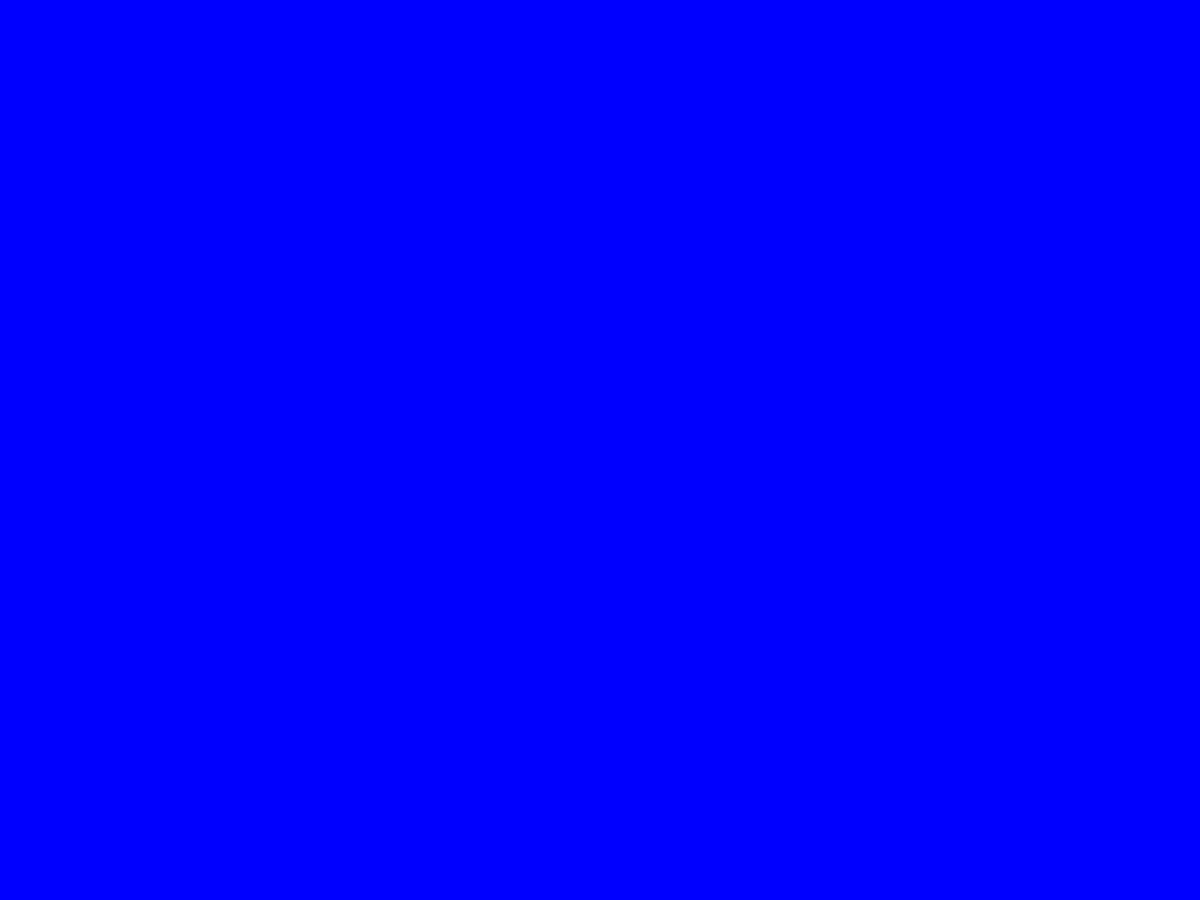

In [11]:
fig = plt.figure(facecolor='b')    # 指定颜色

注意: 如果在非交互式环境绘图环境中, 需要使用`plt.show()`才能看见上图.

<IPython.core.display.Javascript object>


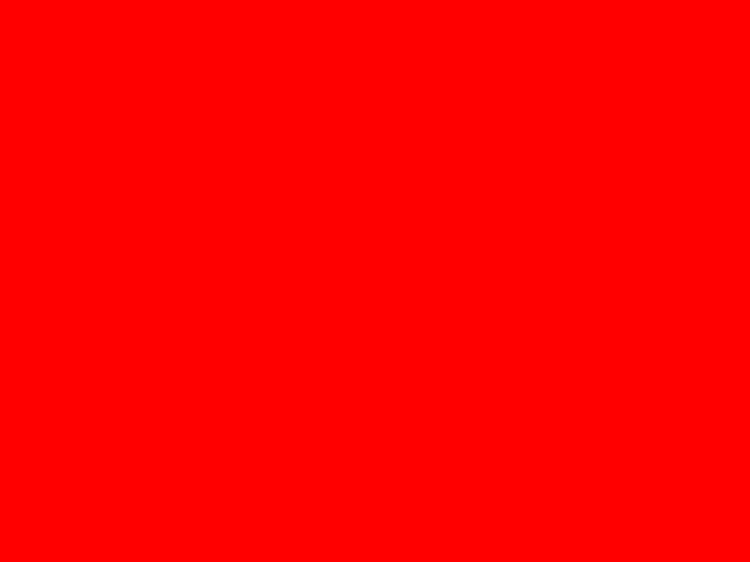

In [13]:
fig = plt.figure(figsize=(4,3),    # 指定大小
                 facecolor='r')

<IPython.core.display.Javascript object>


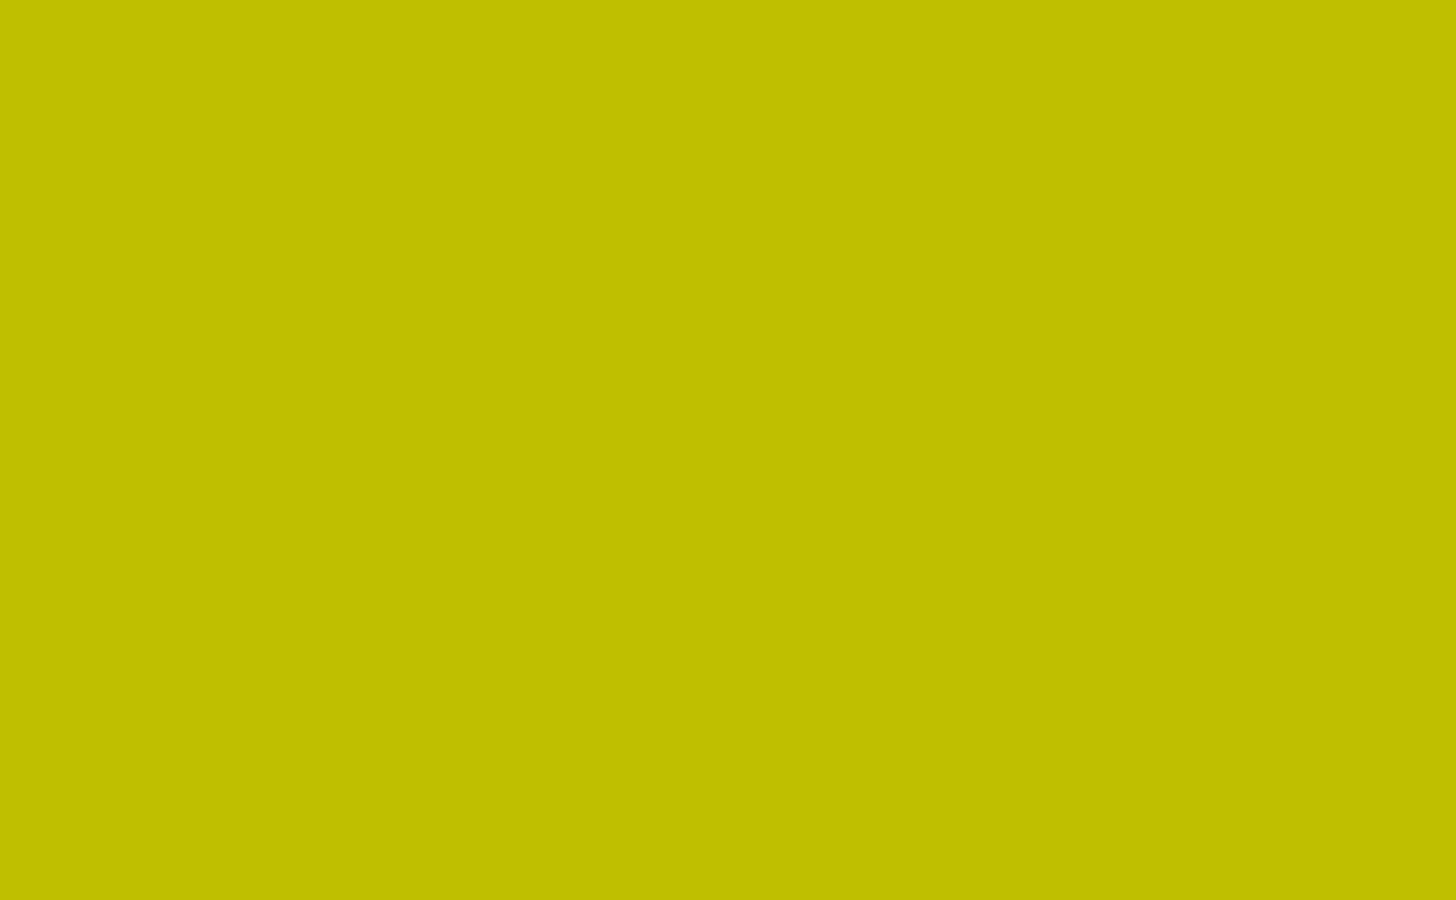

In [15]:
fig = plt.figure(figsize = plt.figaspect(0.618),    # 指定宽度和长度的比例
                 facecolor='y')

## Axes

<IPython.core.display.Javascript object>


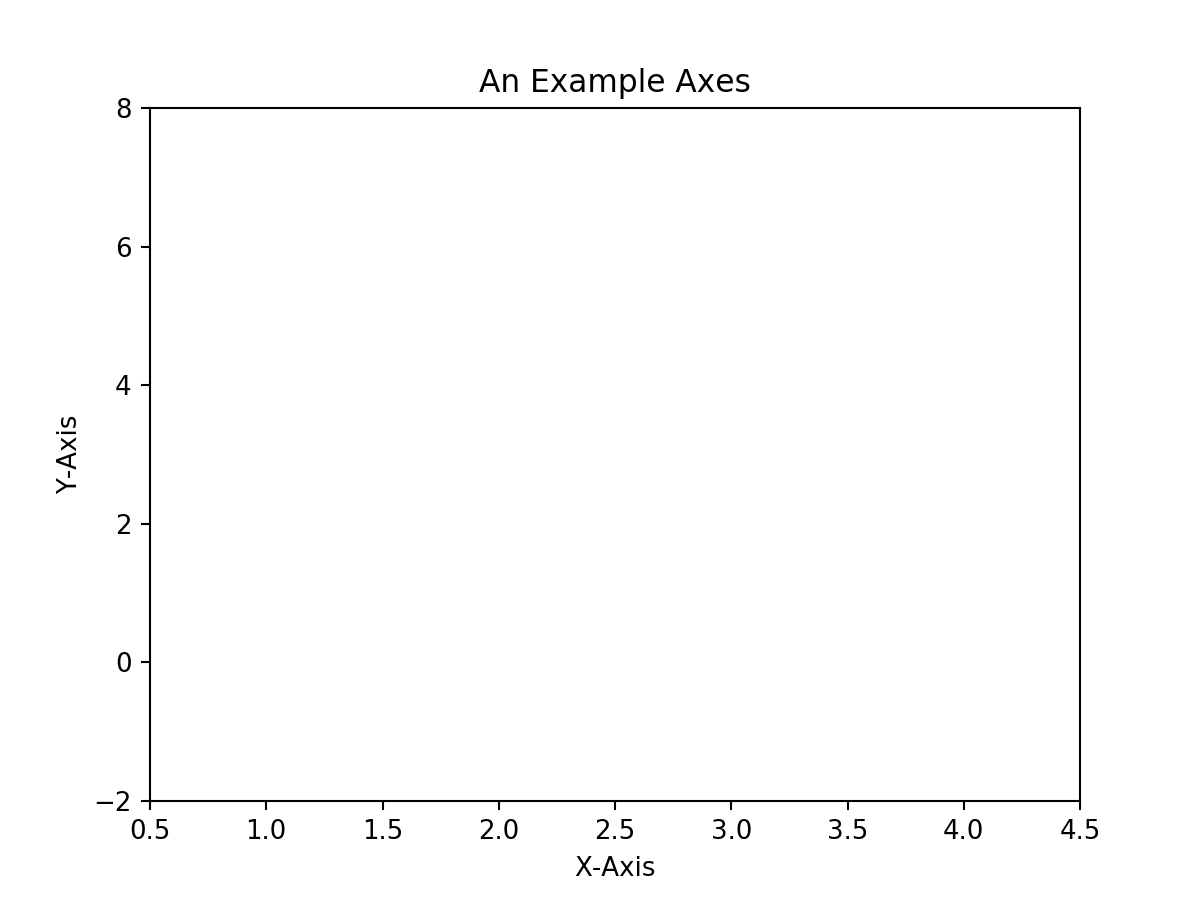

[(-2, 8),
 Text(0, 0.5, 'Y-Axis'),
 (0.5, 4.5),
 Text(0.5, 0, 'X-Axis'),
 Text(0.5, 1.0, 'An Example Axes')]

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim = [0.5, 4.5], ylim = [-2, 8],
       title = "An Example Axes",
       xlabel = 'X-Axis', ylabel = 'Y-Axis')

可以看到，上面不仅绘制出来图形，还会把参数也打印出来，如果你不希望打印参数，可以在`ax.set()`后面加上`;`。

<IPython.core.display.Javascript object>


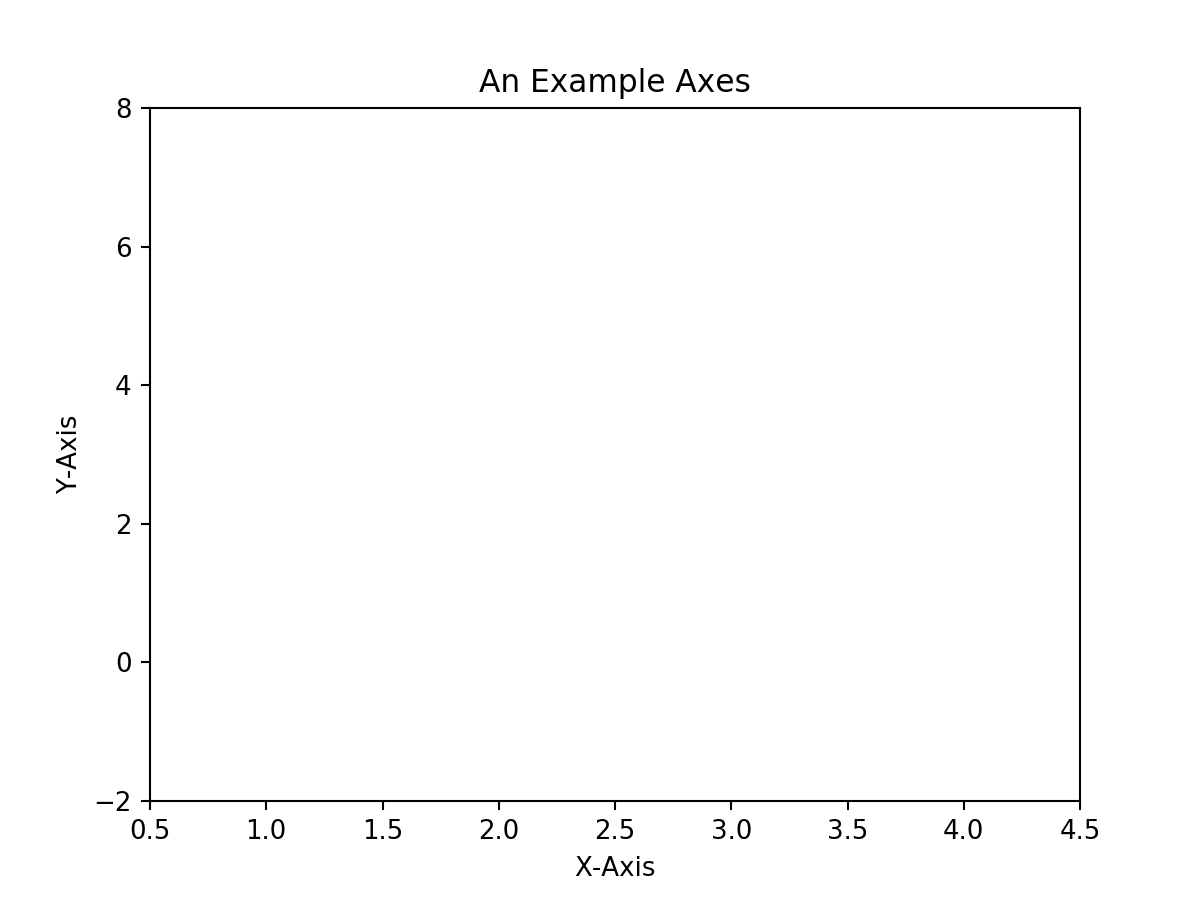

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim = [0.5, 4.5], ylim = [-2, 8],
       title = "An Example Axes",
       xlabel = 'X-Axis', ylabel = 'Y-Axis');

`Matplotlib`的很多性质可通过`ax.set_something`实现。

比如上面的代码也可以写成下面这种形式：

<IPython.core.display.Javascript object>


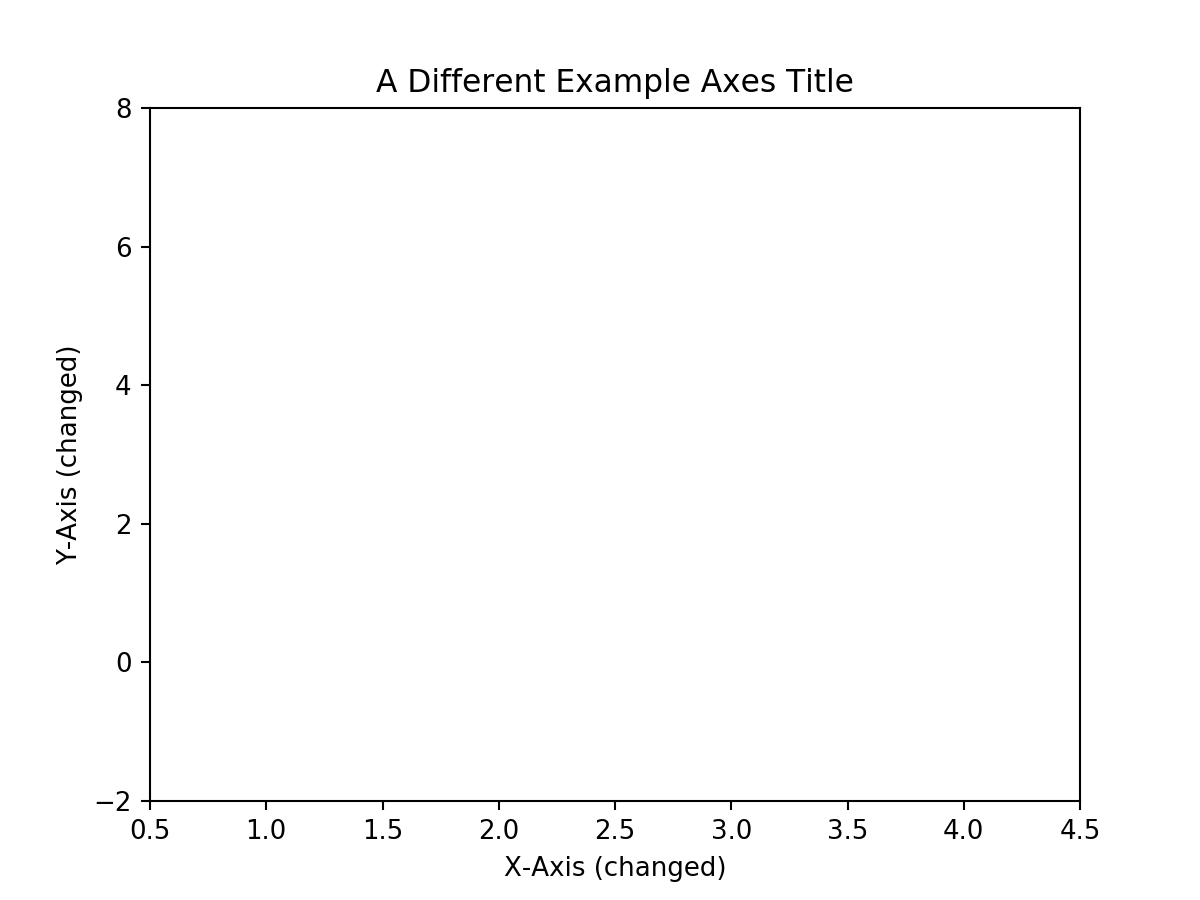

Text(0.5, 0, 'X-Axis (changed)')

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('A Different Example Axes Title')
ax.set_ylabel('Y-Axis (changed)')
ax.set_xlabel('X-Axis (changed)')

## 绘图初探

大部分绘图操作作用在`Axes`中, 我们首先介绍两种简单的绘图方法: `plot`与`scatter`.

<IPython.core.display.Javascript object>


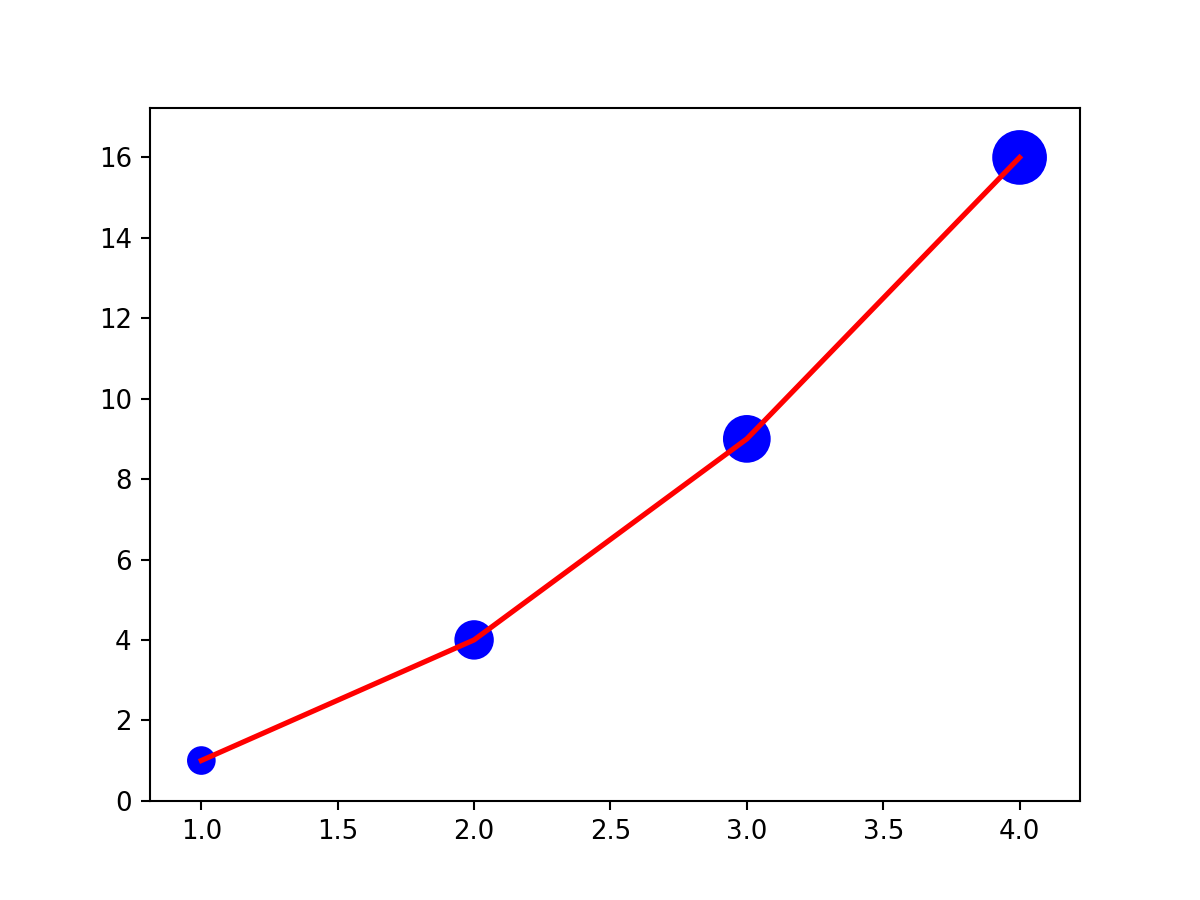

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

# 折线图
ax.plot([1, 2, 3, 4], [1, 4, 9, 16],
        color = 'r',
        linewidth = 2)

# 散点图
ax.scatter([1, 2, 3, 4], [1, 4, 9, 16],
           s = [100, 200, 300, 400],    # 点的大小
           color = 'b',
           marker = 'o')    # 点的形状

## 多个Axes

<IPython.core.display.Javascript object>


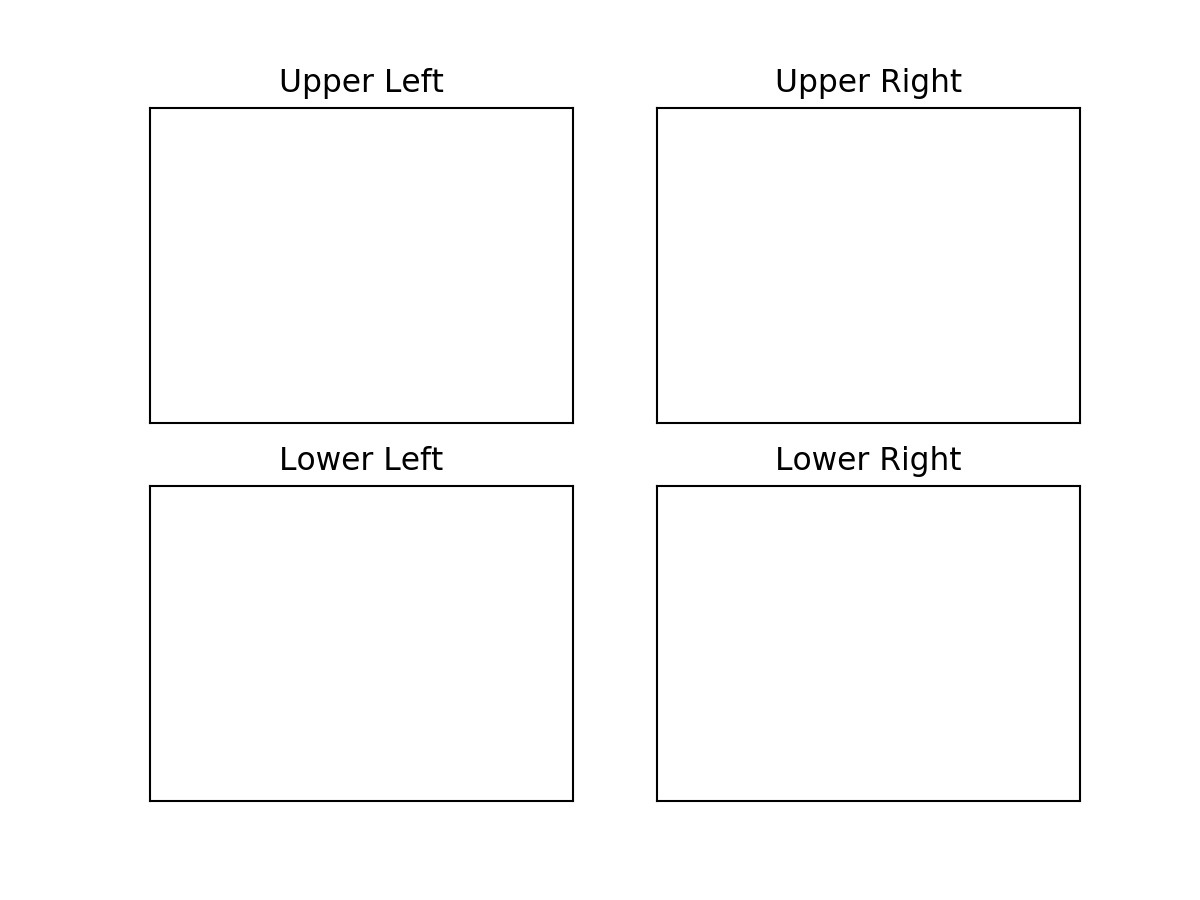

In [43]:
# 一共2行2列，4个子图
fig, axes = plt.subplots(nrows = 2, ncols = 2)

axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])

In [39]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B810A79D30>,
      dtype=object)

可以看到，axes是一个numpy的2*2数组，刚好对应了4个子图。

使用`plt.subplots()`不带参数的时候, 默认创建只有一个`subplot`的`figure`.

```python
fig = plt.figure()
ax = fig.add_subplot(111)
```

可以替换为:

```python
fig, ax = plt.subplots()
```

<IPython.core.display.Javascript object>


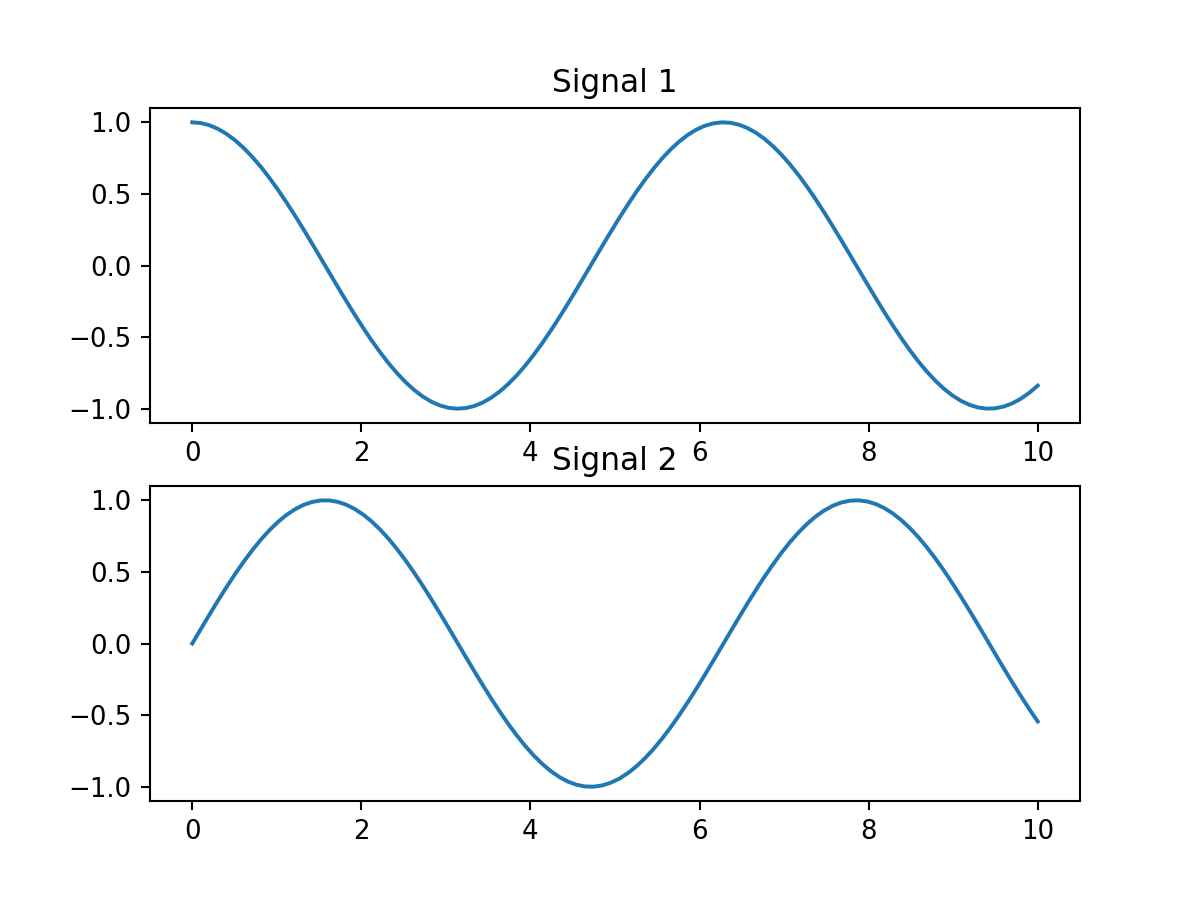

In [46]:
fig, axes = plt.subplots(2, 1)

x = np.linspace(0, 10, 100)
y1, y2 = np.cos(x), np.sin(x)
names = ['Signal 1', 'Signal 2']

axes[0].plot(x, y1)
axes[1].plot(x, y2)
for i, ax in enumerate(axes):
    ax.set_title(names[i])

#plt.savefig("ex1.png", dpi=600)

# 绘图函数概览

<IPython.core.display.Javascript object>


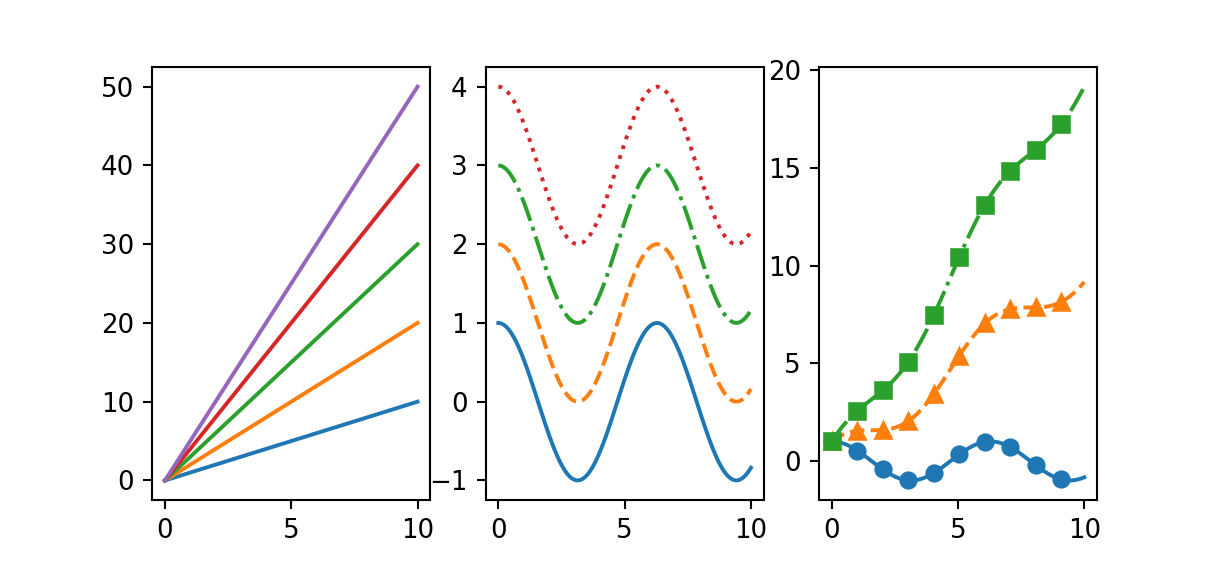

In [62]:
x = np.linspace(0, 10, 100)
fig, axes = plt.subplots(ncols = 3,
                         figsize = (6.5, 3))

for i in range(1, 6):
    axes[0].plot(x, i * x)
    
for i, ls in enumerate(['-', '--', '-.', ':']):
    axes[1].plot(x, np.cos(x) + i, linestyle=ls)
    
    
for i, (ls, mk) in enumerate(zip(['-', '--', '-.', ':'], ['o', '^', 's'])):
    axes[2].plot(x, np.cos(x) + i*x,
                 linestyle = ls,
                 marker = mk,
                 markevery = 10)

<IPython.core.display.Javascript object>


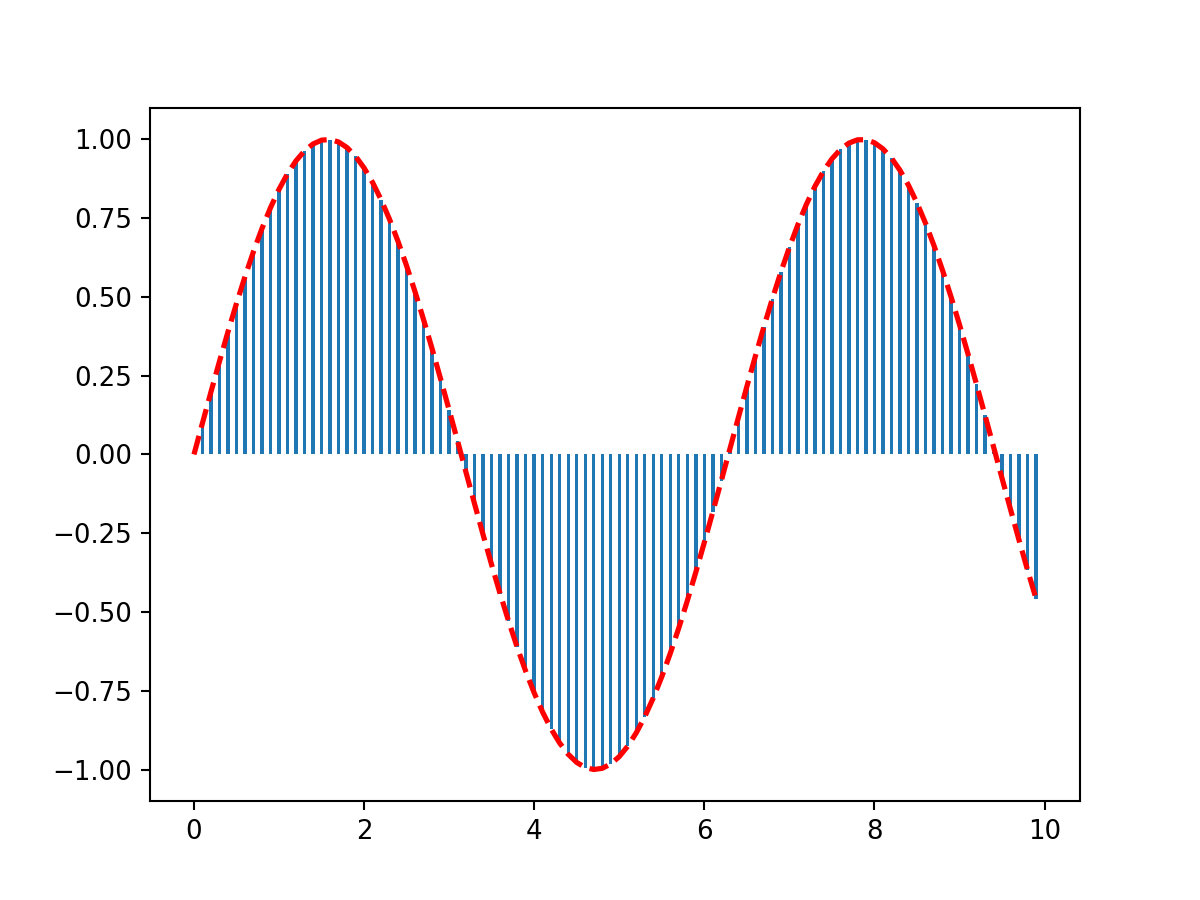

In [66]:
fig, ax = plt.subplots()
x = np.arange(0, 10, 0.1)
y = np.sin(x)
ax.bar(x, y, width=0.04, linewidth=0.2)
ax.plot(x, y, 'r--', linewidth=2)

<IPython.core.display.Javascript object>


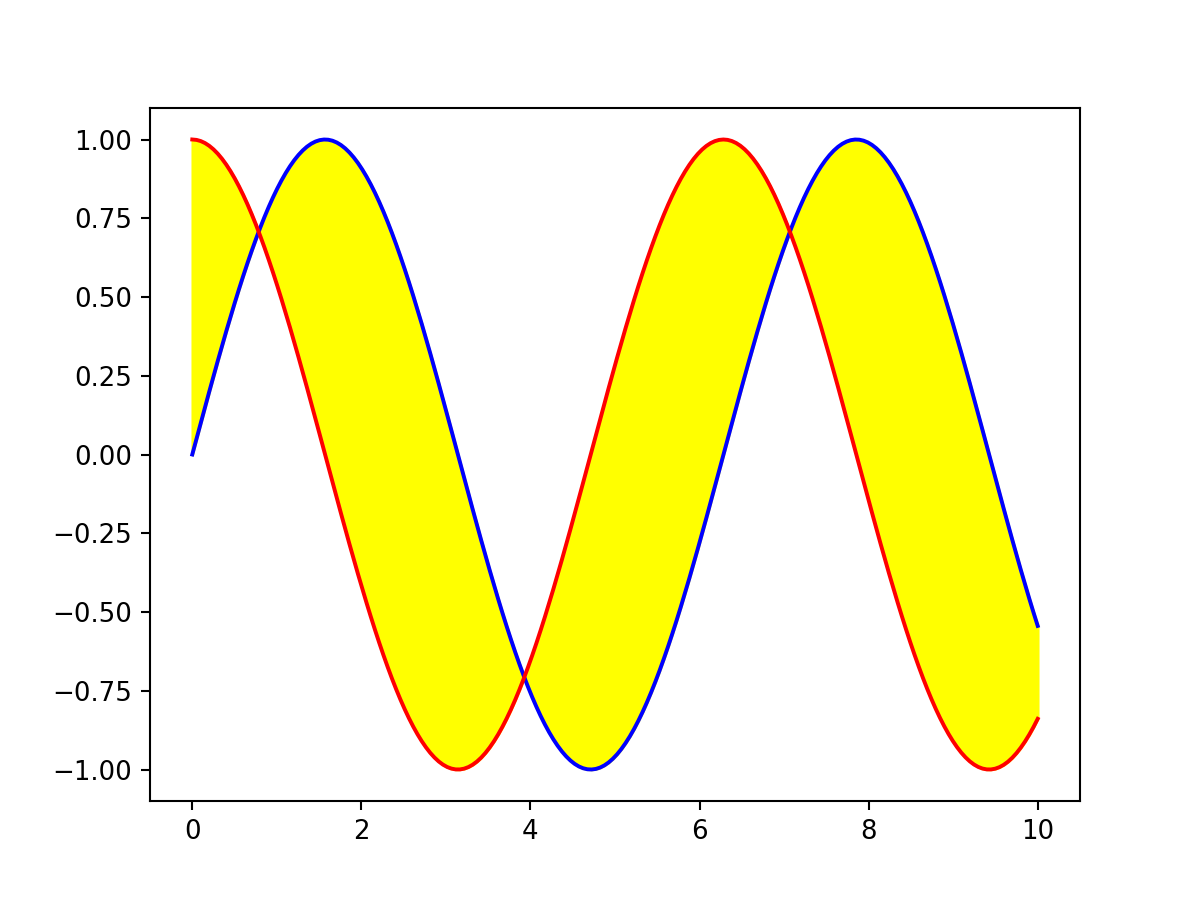

In [69]:
x = np.linspace(0, 10, 200)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()

# 填充y1，y2之间的空间
ax.fill_between(x, y1, y2, color = 'yellow')

ax.plot(x, y1, color = 'blue')
ax.plot(x, y2, color = 'red')

**`data` keyword argument**

上面的图形也可以采用下面的形式：

<IPython.core.display.Javascript object>


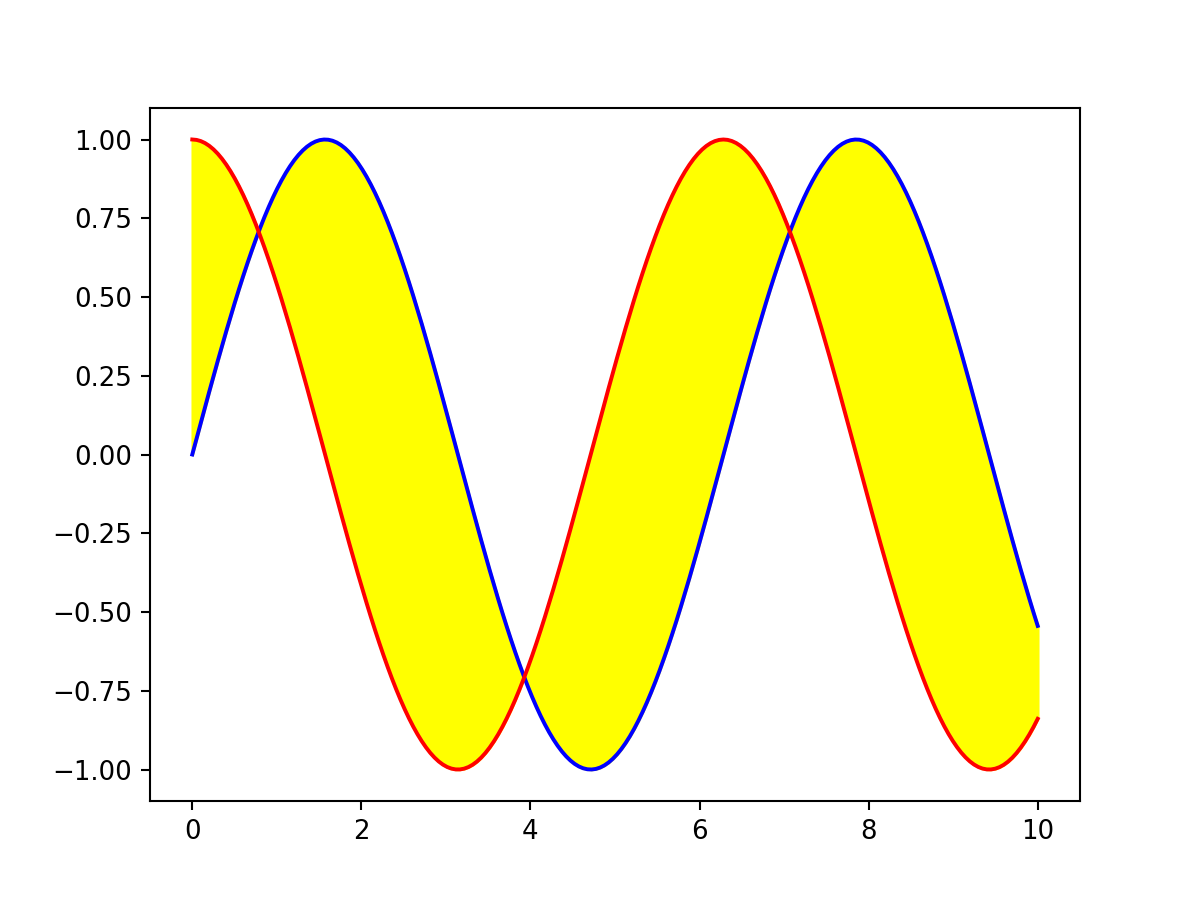

In [76]:
x = np.linspace(0, 10, 200)

data_obj = {'x':x,
            'sin':np.sin(x),
            'cos':np.cos(x)}

fig, ax = plt.subplots()

ax.fill_between('x', 'sin', 'cos',
                color = 'yellow',
                data = data_obj)
ax.plot('x', 'sin', color = 'blue', data = data_obj)
ax.plot('x', 'cos', color = 'red', data = data_obj)

所有参数都以一个字典的形式传入到`data`参数中，这样的好处在于在绘图时传参比较方便。

In [77]:
np.random.seed(1)

In [83]:
# Generate data
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

# Get average of every 100 samples
x_pos = x_raw.reshape(-1, 100).min(axis=1)
y_avg = y_raw.reshape(-1, 100).mean(axis=1)
y_err = y_raw.reshape(-1, 100).ptp(axis=1)

bar_width = x_pos[1] - x_pos[0]

# Make a made up future prediction with a fake confidence
x_pred = np.linspace(0, 30)
y_max_pred = y_avg[0] + y_err[0] + 2.3 * x_pred
y_min_pred = y_avg[0] - y_err[0] + 1.2 * x_pred

# Just so you don't have to guess at the colors...
barcolor, linecolor, fillcolor = 'wheat', 'salmon', 'lightblue'

<IPython.core.display.Javascript object>


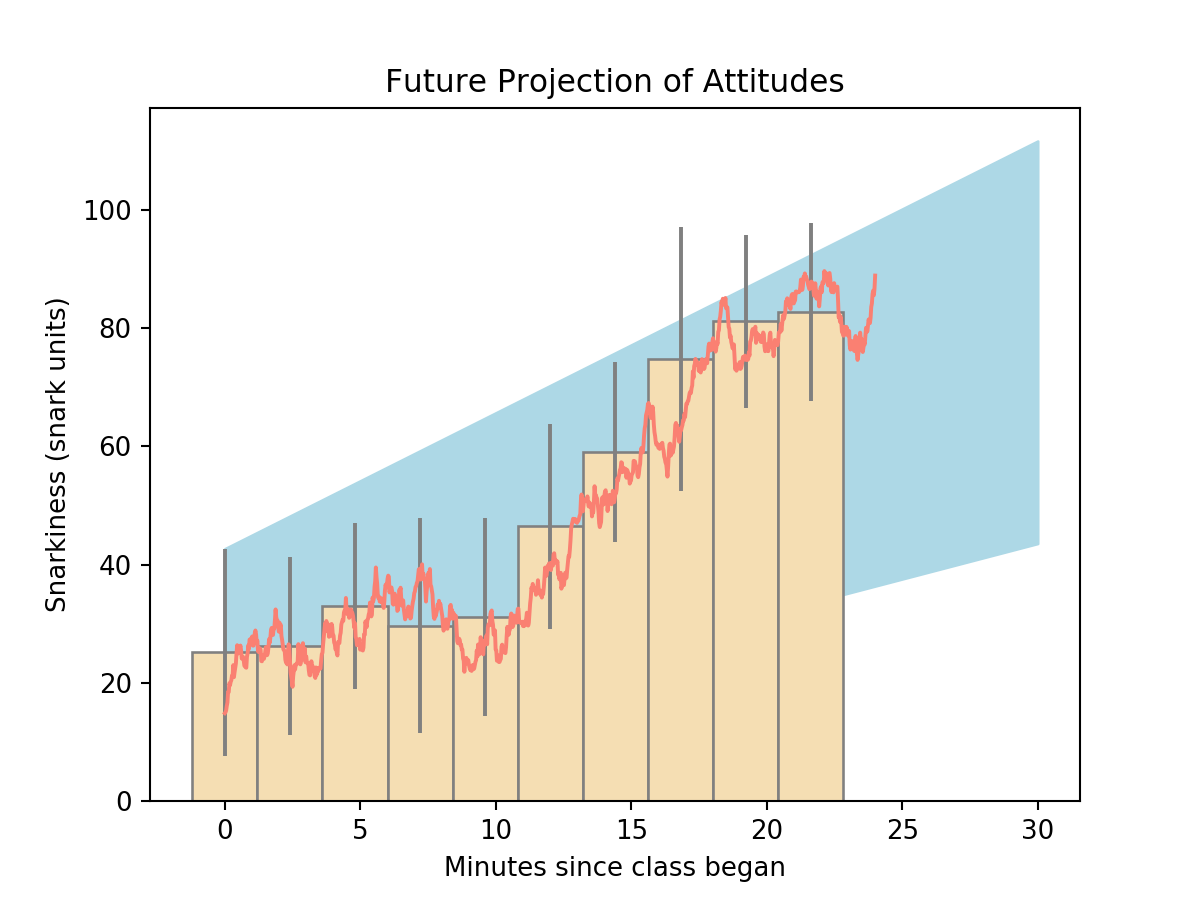

[Text(0, 0.5, 'Snarkiness (snark units)'),
 Text(0.5, 0, 'Minutes since class began'),
 Text(0.5, 1.0, 'Future Projection of Attitudes')]

In [84]:
fig, ax = plt.subplots()

ax.plot(x_raw, y_raw, color=linecolor)
ax.bar(x_pos, y_avg, width=bar_width, color=barcolor, 
       yerr=y_err, ecolor='gray', edgecolor='gray')
ax.fill_between(x_pred, y_min_pred, y_max_pred, 
                color=fillcolor)

ax.set(title='Future Projection of Attitudes', 
       ylabel='Snarkiness (snark units)', 
       xlabel='Minutes since class began')

# plt.savefig("bar_fill.png")

# 绘图属性

## 颜色

In [ ]:
54：56